# ***Time Series Analysis Of Canadian Births***

#### The Objectives Of This Assingment Are To Conduct A Time Series Analysis On An Open Source Data Set Of Our Choice. In Doing So We Must 1. De-Trend And De-Seasonalize The Data 2.Conduct ARIMA or SARIMA 3. Evaluate The Model 

### The Following Applications Of Time Series Analysis Were Presented In The Lecture

| Number | Application |
| ---: | :--- |
| 1 | Economic Forcasting |
| 2 | Sales Forcasting |
| 3 | Weather Forcasting |
| 4 | Budgetary Analysis |  
| 5 | Stock Market Analysis |
| 6 | Process And Quality Control | 
| 7 | Utility Studies |
| 8 | Census Analysis |
| 9 | Earthquaqe Prediction |

### The Dataset Chossen Was Downloaded From Statistics Canada Website And Covers The Number Of Live Births Per Month From January 2010 Through To The End Of December 2010.

In [1]:
import pandas as pd
from pandas.core.nanops import nanmean as pd_nanmean
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import stattools
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [4]:
births=pd.read_csv('C:/CIND840/cbirths3.csv',header=0)

In [5]:
print('Shape of the dataset:', births.shape)


Shape of the dataset: (132, 4)


In [6]:
print(births.dtypes)


Year      object
Births     int64
Year.1     int64
Month      int64
dtype: object


In [7]:
births.head()

,Year,Births,Year.1,Month
0,10-Jan,30363,2010,1
1,10-Feb,27740,2010,2
2,10-Mar,32268,2010,3
3,10-Apr,31449,2010,4
4,10-May,31908,2010,5


In [8]:
births.describe()

,Births,Year.1,Month
count,132.000000,132.000000,132.000000
mean,31429.045455,2015.000000,6.500000
std,1727.522989,3.174324,3.465203
min,27119.000000,2010.000000,1.000000
25%,30334.000000,2012.000000,3.750000
50%,31489.000000,2015.000000,6.500000
75%,32699.250000,2018.000000,9.250000
max,34835.000000,2020.000000,12.000000


#### The Following Code Block, Inspired By Lab 7 Enables The Time Series To Be Plotted

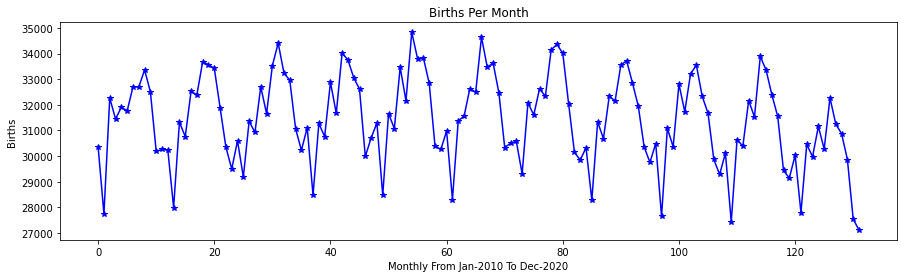

In [9]:
'''
Parameters:
X : a list of pandas series
'''
def ts_plot(X, xlabel='Time', ylabel='Observed Quantity', title='Time Series', height=4, width=15):
  fig, ax = plt.subplots(figsize=(width, height))
  markers = ['*', '.', 'o', '^']
  colors = ['b', 'r', 'g', 'y']
  # Add x-axis and y-axis
  for i, xi in enumerate(X):
    xi.plot(ax=ax, linestyle='-', marker=markers[i], color=colors[i])
  # Set title and labels for axes
  ax.set(xlabel=xlabel,
         ylabel=ylabel,
         title=title)
  if len(X) > 1: # more than one series
    ax.legend()
  plt.show()

ts_plot([births.Births], xlabel='Monthly From Jan-2010 To Dec-2020', ylabel='Births', title='Births Per Month' )

Of The Four Data Patterns Presented In The Class, It Appears That The Data Does Not Have Unexpected(Irregular) Movements Preventing It From Being Labeled Random Movements.

Furthermore, The Data Does Not Have Upward And Downward Movements Without Regular Periodicity, Or Peaks And Valleys But At Unpredictable Times Meaning The Data Is Not Cyclical

In [10]:
There Also Does Not Appear That The Data Has An Overall Tendancy For A Long Period Of Time. That Means That The Data Does Not Generate An Overall Upward Or Downward Trend To Represent A General Trend. 

SyntaxError: invalid syntax (Temp/ipykernel_14476/2730732412.py, line 1)

This It Can Be Inferred That The Data Has A Seasonal Pattern In That There Are Periodic Fluctuations That Occur At Regular Intervals And There Are Peaks And Valeys That Appear Regularly

### A Basic Look At The Histogram Indicates The Data Is Somewhat Normal

In [ ]:
plt.hist(births.Births)

In [ ]:
plt.hist(births.Births, density=False, bins=11)  # density=False would make counts


In [ ]:
births.hist

# Task1: Detrend And Deseasonalize The Data

### Examining The AutoCorrelation Functions

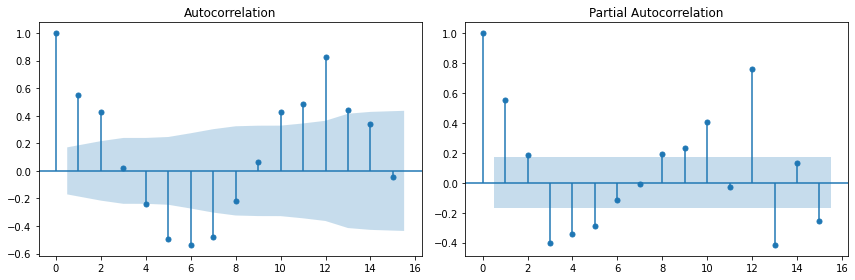

In [11]:
'''
Parameters:
Xt : a pandas series
nlag : count of lags to be used in acf/pacf
'''
def acf_pacf_plotter(Xt, nlag=30, fig_size=(12, 4), alpha=0.05):
    plt.figure(figsize=fig_size)
    layout = (1, 2)
    
    # Assign axes
    ax_acf= plt.subplot2grid(layout, (0, 0))
    ax_pacf = plt.subplot2grid(layout, (0, 1))
    
    # Plot graphs
    plot_acf(Xt.dropna(), alpha=alpha, lags=nlag, ax=ax_acf)
    plot_pacf(Xt.dropna(), alpha=alpha, lags=nlag, ax=ax_pacf)
    plt.tight_layout()
    return None

acf_pacf_plotter(births.Births, nlag=15)

#### ARIMA models assume that the mean, varaiance, and autocorrelations do not change over time. Deciding On The Number Of Differencing Needed Is Considered To Be In The Identification Stage of ARIMA models.The number of MA terms needed in a Time Series is determined by ACF.The Lag At Which PACF Is Cutting Off Indicates The p In AR. 

In [12]:
def regress(Xt, Yt):
  trend_model = LinearRegression(copy_X=True, normalize=True, fit_intercept=True)
  trend_model.fit(Xt, Yt)
  print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
  trend_model.intercept_))
  return trend_model

trend_model = regress(Xt = df_co2.day_number.values.reshape(-1, 1),  Yt = df_co2.CO2.values)
# create a new column CO2_TrendComp to hold the trend values predicted by regression model
df_co2['CO2_TrendComp'] = pd.Series(data=trend_model.predict(df_co2.day_number.values.reshape(-1, 1)), index=df_co2.index)
# Subtract CO2_TrendComp from CO2 to get the CO2_Detrended values
df_co2['CO2_Detrended'] = df_co2.CO2 - df_co2.CO2_TrendComp
ts_plot([df_co2.CO2, df_co2.CO2_TrendComp], title='CO2 Concentrations Data: Trend using regression')
ts_plot([df_co2.CO2_Detrended], title='CO2 Concentrations Data: Detrended using regression')
# Notice: even though the trend is removed but the time series is still auto correlated.
# We can confirm this by observing acf/pacf plots
# the autocorrelation values outside the blue-band (conf-interval)
acf_pacf_plotter(df_co2.CO2_Detrended, nlag=15)


NameError: name 'df_co2' is not defined